In [1]:
import pandas as pd
import matplotlib
import ast
import numpy as np
from scipy.signal import stft, welch, spectrogram, get_window, periodogram


csv_file = pd.read_csv('./../data/basic_mdurance_1.csv', sep=';')
column_1 = csv_file['rms_1_(µV)']
rms_csv = column_1.to_list() 

csv_file_2 = pd.read_csv('./../data/advanced_mdurance_1.csv', sep=';')
raw_csv = csv_file_2['emg_muscle_1_(µV)']
angles_csv = csv_file_2['angles_1']

def get_rms(rms_csv):
    #rms_list = ast.literal_eval(rms_csv)
    result = []
    for value in rms_csv:
        replaced_value = value.replace(',', '.')
        result.append(float(replaced_value))

    return result

def get_raw(raw_csv):
    raw = raw_csv.replace('nan', "'0,0'")

    raw_list = ast.literal_eval(raw)
    result = []
    for value in raw_csv:
        replaced_value = value.replace(',', '.')
        result.append(float(replaced_value))

    return result



rms = get_rms(rms_csv)
emg = raw_csv.to_list()
angles = angles_csv.to_list()

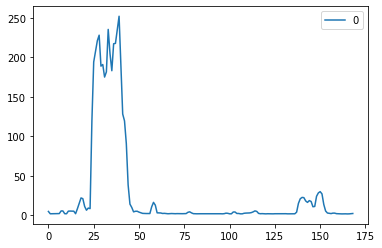

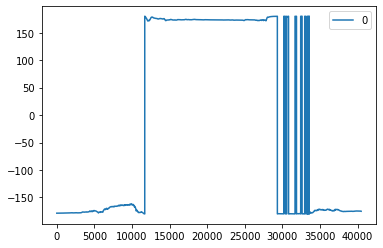

In [2]:
df_rms = pd.DataFrame(rms)
df_rms.plot()

df_rom = pd.DataFrame(angles)
df_rom.plot()

In [3]:
fft = np.fft.fft(emg[:len(emg) // 9])
fft = np.abs(fft[:len(fft) // 2])
             
fft_cropped = np.fft.fft(emg, 1024)
fft_cropped = np.abs(fft_cropped[:len(fft_cropped) // 2])

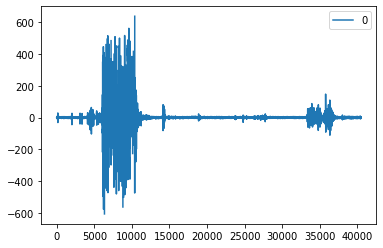

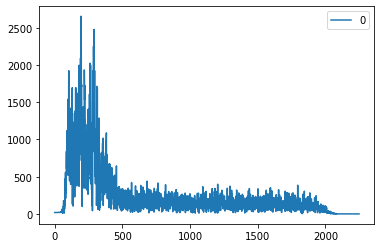

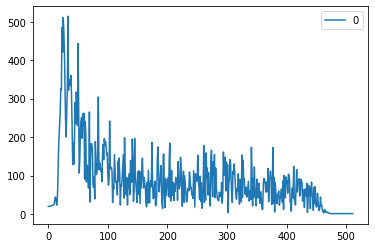

In [4]:
df_emg = pd.DataFrame(emg)
df_emg.plot()

df_fft = pd.DataFrame(fft)
df_fft.plot()

df_fft_cropped = pd.DataFrame(fft_cropped)
df_fft_cropped.plot()

In [5]:
f, Pxx = welch(emg[:len(emg)//8], fs=1024, window="hamming",scaling="spectrum")

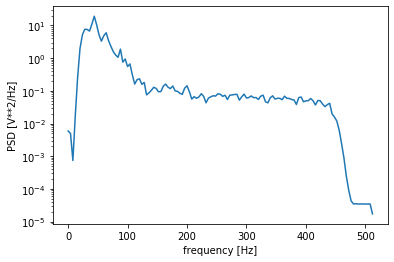

In [6]:
import matplotlib.pyplot as plt
plt.semilogy(f, Pxx)
#plt.ylim([0.5e-3, 1])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [7]:
def getWelchWindows(emg, frequency=1024, emg_window=256):
    
    welch_data = []
    #window = float(frequency) * float(emg_window) * 2
    window = emg_window
    start = 0
    end = int(window)
    increment = int(window / 2)
    sample = emg[start:end]
    sample_len = len(sample)
    
    while sample_len:
        welch_sample = dict()
        f, Pxx = welch(np.asarray(sample), fs=1024, window="hamming", nperseg=256)
        welch_sample['f'] = f
        welch_sample['Pxx'] = Pxx
        welch_data.append(welch_sample)
        start += increment
        end += increment
        sample = emg[start:end]
        sample_len = len(sample)
    return welch_data

In [8]:
fft_cropped_windows = getWelchWindows(fft_cropped)

D:\Anaconda3\envs\AnacondaTFG\lib\site-packages\scipy\signal\spectral.py:1966: UserWarning: nperseg = 256 is greater than input length  = 128, using nperseg = 128
  .format(nperseg, input_length))


In [9]:
df_rms[0]

0      5.037
1      2.107
2      2.148
3      2.204
4      2.183
       ...  
164    2.033
165    1.923
166    1.988
167    2.251
168    2.442
Name: 0, Length: 169, dtype: float64

In [10]:
def get_sections(df):
    result = []
    threshold = float(df.max()*0.1)
    start = df[0][0]
    in_section = False
    section = []
    index=0
    
    for index, row in df.iterrows():
        if row[0] > threshold and not in_section:
            result.append(index)
            in_section = True
        if row[0] < threshold and in_section:
            result.append(index)
            in_section = False
        index += 1
        
    return result

In [11]:
sections = get_sections(df_rms)

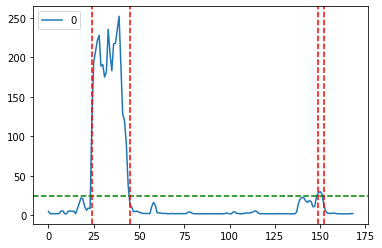

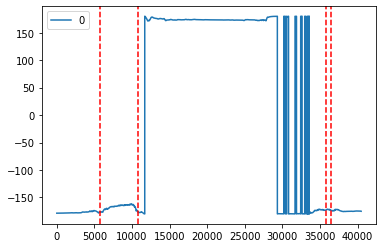

In [12]:
rom_points_per_rms = round(len(df_rom[0])/len(df_rms[0]))

df_rms = pd.DataFrame(rms)
df_rms.plot()
plt.axhline(y=float(df_rms.max()*0.1), color='g', linestyle='--', label='vline1.5custom')
for value in sections:
    plt.axvline(x=value, color='r', linestyle='--', label='vline1.5custom')
    
df_rom = pd.DataFrame(angles)
df_rom.plot()
for value in sections:
    plt.axvline(x=value*rom_points_per_rms, color='r', linestyle='--', label='vline1.5custom')

In [13]:
sections

[24, 45, 149, 152]

In [14]:
def get_highest_value_per_section(df_rms, start_section, end_section):
    array = []
    while start_section < end_section:
        array.append(df_rms[0][start_section])
        start_section += 1
    
    df = pd.DataFrame(array)
    maximum = df[0].max()
    return maximum

In [17]:
max = get_highest_value_per_section(df_rms, 24, 45)

In [18]:
max

252.031